## **构建简单的神经网络**

深度神经网络由多个层(layer)组成, 通常将其称之为**模型(Model)**.整个模型接受输入(特征), 生成输出(预测), 并且包含一些参数.在模型内部每个单独的层都会接受一些输入(前一层提供), 生成输出(下一层的输入), 并且包含一组参数, 层层向下传递, 就可以得到最终的输出值.

神经网络中的参数, 就是每一层的权重和偏执.

#### **三层神经网络**

以一个三层神经网络为例, 实现从输入到输出的计算, 这个过程就是**前向传播(Forward propagation)**

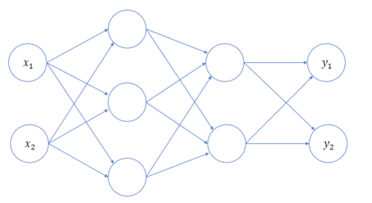

第零层有2个神经元, 第一层(隐藏层)有三个神经元, 第二层(隐藏层)有两个神经元, 第三层(输出层)有两个神经元.

#### **信号传递**

实际上每一层除了权值外还有偏置, 输入信号加权和经过激活函数处理逐层传递信息.

第零层 -> 第一层

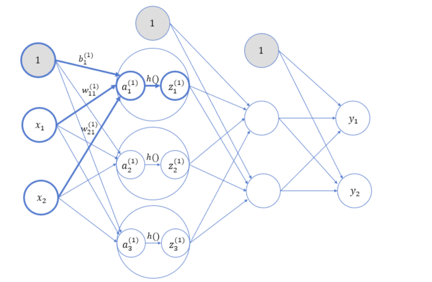

权重和神经元的上标（1）表示网络层号。而下标对于神经元来说，就是这一层内的“索引号”；对于权重来说则包含两个数字，分别代表前一层和后一层神经元的索引号。所以，w21(1) 就表示这是第1层的权重（输入层到第1层），并且是从第2个输入节点到第1层第1个节点。偏置的下标只有1个，因为前一层的偏置节点只有一个。

对于第一层的第一个神经元而言, 进行如下计算:

$$
a_1^{(1)} = w_{11}^{(1)} x_1 + w_{21}^{(1)} x_2 + b_1^{(1)}
$$

$$
z_1^{(1)} = h(a_1^{(1)})
$$

第一层第二, 第三神经元有:

$$
a_2^{(1)} = w_{12}^{(1)} x_1 + w_{22}^{(1)} x_2 + b_2^{(1)}
$$

$$
a_3^{(1)} = w_{13}^{(1)} x_1 + w_{23}^{(1)} x_2 + b_3^{(1)}
$$

可以直接写成矩阵乘法的形式:

$$
a^{(1)} = x W^{(1)} + b^{(1)}
$$

其中:
$$
\mathbf{A}^{(1)} = \left( a_1^{(1)}\ \ a_2^{(1)}\ \ a_3^{(1)} \right),\quad
\mathbf{X} = \left( x_1\ \ x_2 \right),\quad
\mathbf{B}^{(1)} = \left( b_1^{(1)}\ \ b_2^{(1)}\ \ b_3^{(1)} \right)
$$

$$
\mathbf{W}^{(1)} =
\begin{pmatrix}
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}
\end{pmatrix}
$$

由于有两个输入节点, 三个第一层节点, 所以对于全连接层的权重W就是一个2 * 3的矩阵

类似的, 第一层 -> 第二层

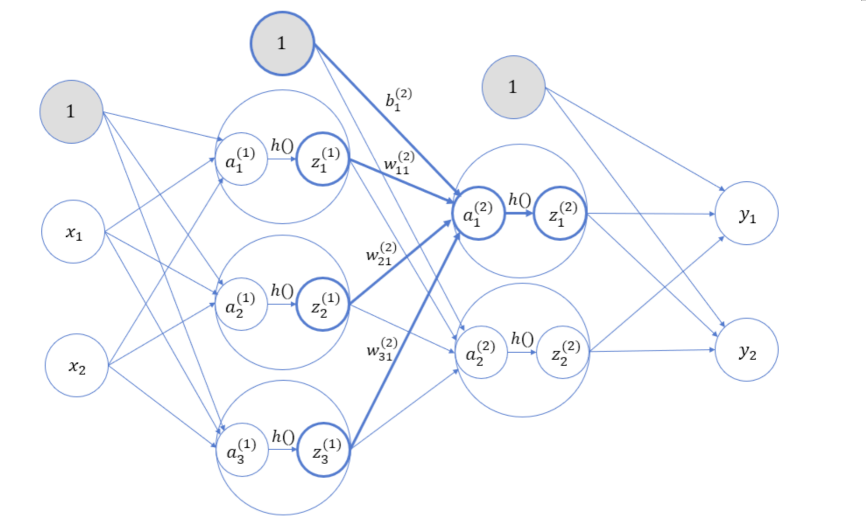

第一层有三个输入神经元, 两个第二层节点, 所以对于一个全连接层的权重就应该是一个3 * 2的矩阵

第二层 -> 输出层

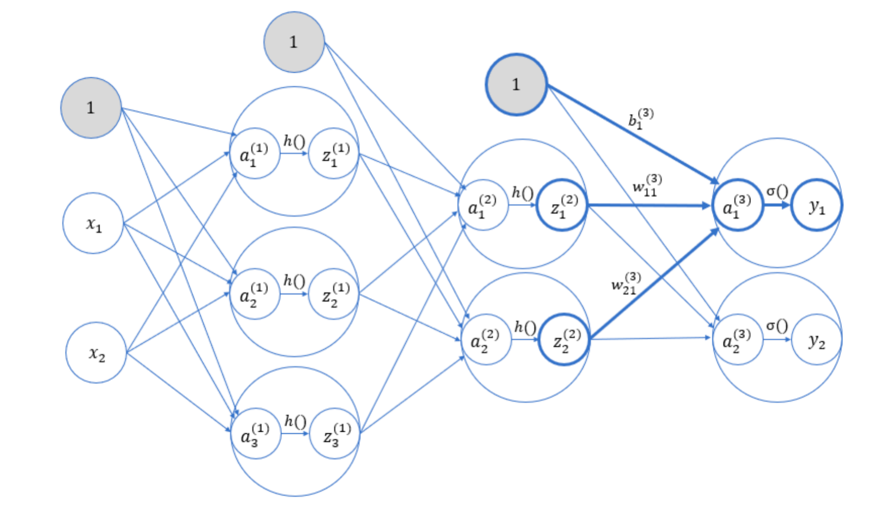

第二层两个神经元, 输出层有两个输出节点, 所以对于一个全连接层的权重应该是一个2 * 2的矩阵, 一般的输出层的激活函数与隐藏层是不同的

#### **简单神经网络代码**

In [3]:
import numpy as np
from common.functions import sigmoid, identity

# 定义神经网络
def network():
    network = {}
    network["W1"] = np.array([[0.1, 0.2, 0.3], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.9, 0.8], [0.7, 0.6], [0.12, 0.4]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    return network


# 定义前向传播
def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity(a3)
    return y

# 定义测试数据
X = np.array([1.0, 0.5])
y = forward(network(), X)
print(y)

[0.33424106 0.74451114]
